In [65]:
#interactive matplotlib graphs
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FileUpload
import pandas as pd
import io
import json

## Upload File

In [6]:
uploaded = FileUpload(accept=".csv")
display(uploaded)

FileUpload(value=(), accept='.csv', description='Upload')

In [7]:
for f in uploaded.value:
    content = f["content"]
    df = pd.read_csv(io.BytesIO(content))
    break
df

Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
129                 8.046354  
130                 8.122973  
131                 8.053065  
132                 8.457058  
133                 8.546648  

[134 rows x 5 columns]

## Provide CSV file URL as interactive input

In [112]:
url = input("Provide direct url of CSV file: ")
df = pd.read_csv(url)
df
# https://github.com/jasperdebie/VisInfo/raw/master/us-state-capitals.csv

Provide direct url of CSV file:  https://github.com/jasperdebie/VisInfo/raw/master/us-state-capitals.csv


name     description   latitude   longitude
0          Alabama      Montgomery  32.377716  -86.300568
1           Alaska          Juneau  58.301598 -134.420212
2          Arizona         Phoenix  33.448143 -112.096962
3         Arkansas     Little Rock  34.746613  -92.288986
4       California      Sacramento  38.576668 -121.493629
5         Colorado          Denver  39.739227 -104.984856
6      Connecticut    Hartford<br>  41.764046  -72.682198
7         Delaware           Dover  39.157307  -75.519722
8           Hawaii        Honolulu  21.307442 -157.857376
9          Florida     Tallahassee  30.438118  -84.281296
10         Georgia     Atlanta<br>  33.749027  -84.388229
11           Idaho           Boise  43.617775 -116.199722
12        Illinois     Springfield  39.798363  -89.654961
13         Indiana    Indianapolis  39.768623  -86.162643
14            Iowa      Des Moines  41.591087  -93.603729
15          Kansas          Topeka  39.048191  -95.677956
16        Kentucky       Frankfort  38.186722  -84.875374
17       Louisiana     Baton Rouge  30.457069  -91.187393
18           Maine         Augusta  44.307167  -69.781693
19        Maryland       Annapolis  38.978764  -76.490936
20   Massachusetts          Boston  42.358162  -71.063698
21        Michigan         Lansing  42.733635  -84.555328
22       Minnesota        St. Paul  44.955097  -93.102211
23     Mississippi         Jackson  32.303848  -90.182106
24        Missouri  Jefferson City  38.579201  -92.172935
25         Montana          Helena  46.585709 -112.018417
26        Nebraska         Lincoln  40.808075  -96.699654
27          Nevada     Carson City  39.163914 -119.766121
28   New Hampshire         Concord  43.206898  -71.537994
29      New Jersey         Trenton  40.220596  -74.769913
30      New Mexico        Santa Fe  35.682240 -105.939728
31  North Carolina         Raleigh  35.780430  -78.639099
32    North Dakota        Bismarck  46.820850 -100.783318
33        New York          Albany  42.652843  -73.757874
34            Ohio        Columbus  39.961346  -82.999069
35        Oklahoma   Oklahoma City  35.492207  -97.503342
36          Oregon           Salem  44.938461 -123.030403
37    Pennsylvania      Harrisburg  40.264378  -76.883598
38    Rhode Island      Providence  41.830914  -71.414963
39  South Carolina        Columbia  34.000343  -81.033211
40    South Dakota          Pierre  44.367031 -100.346405
41       Tennessee       Nashville  36.165810  -86.784241
42           Texas          Austin  30.274670  -97.740349
43            Utah  Salt Lake City  40.777477 -111.888237
44         Vermont      Montpelier  44.262436  -72.580536
45        Virginia        Richmond  37.538857  -77.433640
46      Washington         Olympia  47.035805 -122.905014
47   West Virginia      Charleston  38.336246  -81.612328
48       Wisconsin         Madison  43.074684  -89.384445
49         Wyoming        Cheyenne  41.140259 -104.820236

In [113]:
# source: https://public.opendatasoft.com/explore/dataset/us-state-boundaries/table/
with open("us-state-boundaries.csv") as f:
    sb = [line.split(';')[-2] for line in f.readlines()[1:]] # state boundaries
    sb = ['[['+b[b.find("[[[")+3: b.find("]]]")+1].strip('[').strip(']')+']]' for b in sb]

sb2 = []
for i in range(len(sb)):
    try:
        sb2.append(json.loads(sb[i]))
    except BaseException as e:
        print(i)

sb3 = []
for b in sb2:
    x = []
    y = []
    for xy in b:
        x.append(xy[0])
        y.append(xy[1])
    sb3.append([x, y])

print(sb3[0])

3
[[-64.843729999672, -64.8306170004155, -64.8166740000574, -64.8003289998509, -64.7850010003439, -64.7780049999629, -64.756923000007, -64.7438040000044, -64.7376500004207, -64.7298299996841, -64.727025000328, -64.7081970000824, -64.7016040001075, -64.6832930000708, -64.6752489999265, -64.6684810000495, -64.6404370000478, -64.6391440000621, -64.643689000191, -64.6377349997255, -64.6638549997298, -64.6613010004438, -64.6642589999609, -64.6782290000832, -64.6944889999008, -64.7079069996541, -64.720173999712, -64.7487359997476, -64.7577690001039, -64.7734199996511, -64.7828909996753, -64.8012889997506, -64.7992609999961, -64.8027730004303, -64.8068909998636, -64.8185169998639, -64.8333530001747, -64.849551999893, -64.8580350004284, -64.8725339995569, -64.8897519996245, -64.8997750000177, -64.9052399998634, -64.9061510002576, -64.921034000424, -64.9337140000354, -64.9420610001283, -64.9464720003629, -64.9609639998188, -64.9804139998553, -64.9978610002517, -65.0198210000917, -65.03156500009

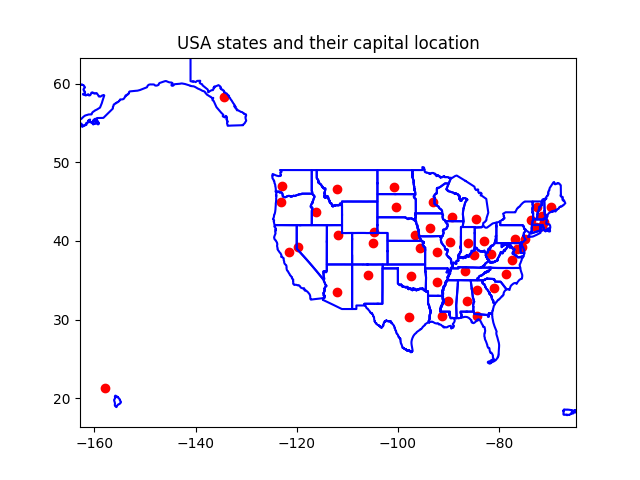

In [114]:
fig, axis = plt.subplots()
x_col = "longitude"
y_col = "latitude"
xlo = df[x_col].min() - 5
xhi = df[x_col].max() + 5
ylo = df[y_col].min() - 5
yhi = df[y_col].max() + 5

x = df[x_col].to_numpy()
y = df[y_col].to_numpy()

plt.axis([xlo, xhi, ylo, yhi])
plt.plot(x, y, "ro")
for b in sb3:
    plt.plot(b[0], b[1], "b")
plt.title("USA states and their capital location")
plt.show()

## Edit CSV file URL variable

In [115]:
url = "https://data.gov.au/data/dataset/7169894e-b518-4933-a900-f79ebc4ec6a3/resource/5d9edabe-b6af-4975-9340-88f55b872a00/download/soe2016antarctic5-year-smoothed-annual-max-min-temperature-by-stationaad.csv"
df = pd.read_csv(url)
df

Year  Macquarie Island MAX  Macquarie Island MIN  Mawson MAX  Mawson MIN  \
0   1948                   NaN                   NaN         NaN         NaN   
1   1949                   NaN                   NaN         NaN         NaN   
2   1950                 6.050                 2.625         NaN         NaN   
3   1951                 6.100                 2.660         NaN         NaN   
4   1952                 6.140                 2.660         NaN         NaN   
..   ...                   ...                   ...         ...         ...   
63  2011                 6.740                 3.200       -8.04      -14.28   
64  2012                 6.840                 3.260       -8.24      -14.40   
65  2013                 6.825                 3.225       -8.10      -14.30   
66  2014                   NaN                   NaN         NaN         NaN   
67  2015                   NaN                   NaN         NaN         NaN   

    Casey MAX  Casey MIN  Davis MAX  Davis MIN  
0         NaN        NaN        NaN        NaN  
1         NaN        NaN        NaN        NaN  
2         NaN        NaN        NaN        NaN  
3         NaN        NaN        NaN        NaN  
4         NaN        NaN        NaN        NaN  
..        ...        ...        ...        ...  
63      -5.86     -12.50      -7.00     -12.98  
64      -6.28     -12.96      -7.10     -13.08  
65      -6.30     -12.90      -7.05     -13.05  
66        NaN        NaN        NaN        NaN  
67        NaN        NaN        NaN        NaN  

[68 rows x 9 columns]

In [116]:
df.head(2)

Year  Macquarie Island MAX  Macquarie Island MIN  Mawson MAX  Mawson MIN  \
0  1948                   NaN                   NaN         NaN         NaN   
1  1949                   NaN                   NaN         NaN         NaN   

   Casey MAX  Casey MIN  Davis MAX  Davis MIN  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN

In [117]:
col_names = df.columns.values
print(col_names)

['Year' 'Macquarie Island MAX' 'Macquarie Island MIN' 'Mawson MAX'
 'Mawson MIN' 'Casey MAX' 'Casey MIN' 'Davis MAX' 'Davis MIN']


In [118]:
[print(i, col_names[i]) for i in range(len(col_names))]
x_col = int(input("Input index number of column to be used for x-axis: "))
y_col = int(input("Input index number of column to be used for y-axis: "))
y_col2 = input("Input index number of column 2 (optional) to be used for y-axis: ")
y_col2 = int(y_col2) if y_col2 else None
print(f"x-axis: {col_names[x_col]}, y-axis: {col_names[y_col]}, y-axis (second): {y_col2}")

0 Year
1 Macquarie Island MAX
2 Macquarie Island MIN
3 Mawson MAX
4 Mawson MIN
5 Casey MAX
6 Casey MIN
7 Davis MAX
8 Davis MIN


Input index number of column to be used for x-axis:  0
Input index number of column to be used for y-axis:  2
Input index number of column 2 (optional) to be used for y-axis:  1


x-axis: Year, y-axis: Macquarie Island MIN, y-axis (second): 1


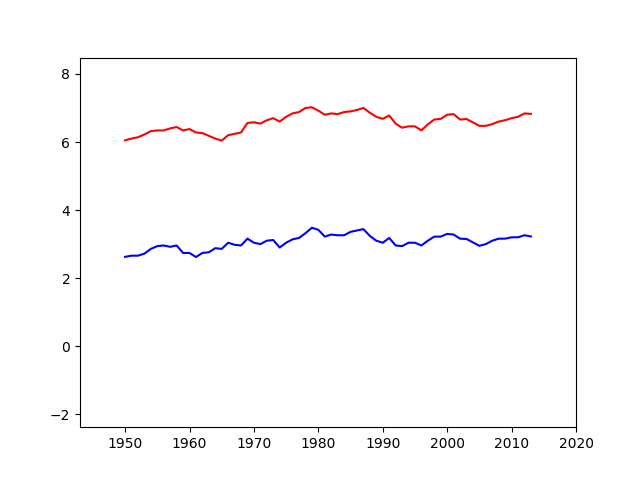

In [119]:
fig, axis = plt.subplots()
xlo = df[col_names[x_col]].min() - 5
xhi = df[col_names[x_col]].max() + 5
ylo = df[col_names[y_col]].min() - 5
yhi = df[col_names[y_col]].max() + 5
if y_col2:
    ylo = min(ylo, df[col_names[y_col2]].min() - 5)
    yhi = max(yhi, df[col_names[y_col]].max() + 5)

x = df[col_names[x_col]].to_numpy()
y = df[col_names[y_col]].to_numpy()
if y_col2:
    y2 = df[col_names[y_col2]].to_numpy()

plt.axis([xlo, xhi, ylo, yhi])
# plt.plot(x, y, "bo")
plt.plot(x, y, "b")
if y_col2:
    # plt.plot(x, y2, "ro")
    plt.plot(x, y2, "r")
plt.show()